# Predicting University Students’ Knowledge of DC Machines

Section 006, Group 27

Chantal Raoux 417234, Yui Mikuriya 65625832, Ryan Pfortmueller 83929604, Serena Zhang 72127699

## Loading the necessary libraries for our project and setting the seed

In [2]:
set.seed(4)
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(cowplot)
library(ggplot2)
library(digest)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in library(OpenImageR): there is no package called ‘OpenImageR’


### Background Information

A DC Machine is an energy conversion device that converts electrical energy to mechanical energy (Anon, 2023). DC machines typically consist of a generator (which converts electrical energy to mechanical energy) and a motor (which converts mechanical energy to electrical energy). DC machines are typically used in settings where high starting torque and accurate speed control over a wide range are important (Byju's, 2022). Some examples of the usage of DC machines include elevators, steel mills, rolling mills, locomotives, and excavators. 

The goal of our project is to predict the degree of knowledge students have of electrical DC machines defined by the variable “class”. 403 university students were tested on their knowledge of DC machines through exam performances of the goal object and related goal object. Based on this, we are investigating the relationship between the exam performance levels of the goal object and related goal objects and its effect on the user’s Electrical DC Machines knowledge level. If we are able to examine the goal object and related goal objects, then we can predict the knowledge level of participants. 

To answer the question, we will use the dataset `Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls`. This database, created by the University of California, aims to study and measure the knowledge level of students regarding Electrical DC Machines. In order to predict the root of the student's knowledge levels, they collected data from 5 predictors:

- STG - The degree of study time for goal object material. 
- SCG - The degree of repetition number of user for goal object material. 
- STR - The degree of study time of user for related objects with goal object.
- LPR - The exam performance of user for related objects with goal object.
- PEG - The exam performance of user for goal object.
- Class(UGC) - The knowledge level of user.

The degree of knowledge can be predicted by examining the exam performance of the use for a related goal object (LPR) and examining the performance for the goal object (PEG). 


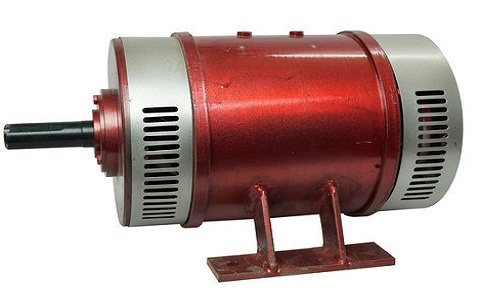

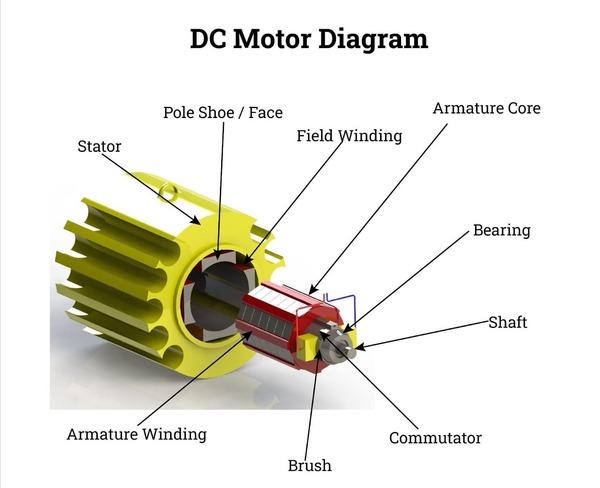

## Overview of Our Methods

Initially, we read our dataset and proceeded to clean and wrangle the data. Subsequently, we selected the necessary columns required for our analysis and converted the "class" variable into a factor. Following that, we employed k-nearest neighbour classification to predict the optimal k value and accuracy of our predictions. To assess the effectiveness of our predictor, we analyzed the accuracy of our predictions concerning the number of neighbors. The methodology is described in detail throughout the document.

### Reading and wrangling our data set

First, we download the data from the web. We are not required to manually split the data into testing and training data, since our data set has already been pre-separated into different sets. From the proposal, we noticed that there is a significant negative relationship between the variables LPR, PEG, and class, which is why we decided to further explore the relationships between these variables in our data analysis. 

In [2]:
print( "Table 1: Loading the training data used in this dataset")
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, destfile = "Knowledge.xls")

# Selecting the training data from sheet 2
knowledge_train <- read_excel(path = "Knowledge.xls", sheet = 2)

# renaming the variable "very_low" to "Very Low" in order to facilitate data analysis with test data later on
knowledge_train$UNS<- recode(knowledge_train$UNS,
                          "very_low" = "Very Low")
knowledge_train


print("Table 2: Loading the testing data of the dataset")
url<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "Knowledge.xls")
knowledge_test<- read_excel(path="Knowledge.xls", sheet=3)
knowledge_test


[1] "Table 1: Loading the training data used in this dataset"


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,NA,NA,NA
0.50,0.75,0.81,0.61,0.26,Middle,NA,NA,NA
0.66,0.90,0.76,0.87,0.74,High,NA,NA,NA


[1] "Table 2: Loading the testing data of the dataset"


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low,NA,NA,NA
0.66,0.68,0.81,0.57,0.57,Middle,NA,NA,NA
0.68,0.64,0.79,0.97,0.24,Middle,NA,NA,NA


Our loaded database above consists of columns containing data that are not necessary for our analysis, so we need to select columns that only contain the variables needed. In this case, we only need the columns LPR, PEG, and class, so we will use the `mutate` and `select` functions to select them. 

In [3]:
print("Table 2.1: The filtered training data set containing only the required variables")
knowledge_training <- mutate(knowledge_train, class=UNS) |>
         select(LPR, PEG,class) 
knowledge_training

print("Table 2.2: The filtered testing data set")
knowledge_testing<-mutate(knowledge_test, class=UNS)|>
    select(LPR, PEG, class)
knowledge_testing

[1] "Table 2.1: The filtered training data set containing only the required variables"


LPR,PEG,class
<dbl>,<dbl>,<chr>
0.00,0.00,Very Low
0.24,0.90,High
0.25,0.33,Low
⋮,⋮,⋮
0.29,0.77,High
0.61,0.26,Middle
0.87,0.74,High


[1] "Table 2.2: The filtered testing data set"


LPR,PEG,class
<dbl>,<dbl>,<chr>
0.26,0.05,Very Low
0.60,0.14,Low
0.60,0.85,High
⋮,⋮,⋮
0.13,0.32,Low
0.57,0.57,Middle
0.97,0.24,Middle


Next, we used `mutate` and `as_factor` to convert the variable `class` into a factor so that it can be predicted using LPR and PEG.

In [4]:
print("Table 2.3: The training data set with class as a factor")
knowledge_training <- knowledge_training[order(knowledge_training$class),] |> mutate(class = as.factor(class))
knowledge_training

print("Table 2.4: The testing data set with class as a factor")
knowledge_testing <- knowledge_testing[order(knowledge_testing$class),] |> mutate(class = as.factor(class))
knowledge_testing

[1] "Table 2.3: The training data set with class as a factor"


LPR,PEG,class
<dbl>,<dbl>,<fct>
0.24,0.90,High
0.20,0.85,High
0.30,0.81,High
⋮,⋮,⋮
0.55,0.09,Very Low
0.08,0.10,Very Low
0.48,0.11,Very Low


[1] "Table 2.4: The testing data set with class as a factor"


LPR,PEG,class
<dbl>,<dbl>,<fct>
0.60,0.85,High
0.67,0.85,High
0.30,0.90,High
⋮,⋮,⋮
0.07,0.09,Very Low
0.09,0.11,Very Low
0.10,0.10,Very Low


Using the `group_by` and `summarize` terms, we will find the distribution of data by counting the number of each `class` variable. The `mutate` term is also used to determine the percentage distribution.

In [5]:
print("Table 3.1: The distribution of classes the training data")
knowledge_train_proportions <- knowledge_training |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge_training))
knowledge_train_proportions

print("Table 3.2: The distribution classes of the testing data")
knowledge_test_proportions <- knowledge_testing |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge_test))
knowledge_test_proportions

[1] "Table 3.1: The distribution of classes the training data"


class,count,percent
<fct>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
Very Low,24,9.302326


[1] "Table 3.2: The distribution classes of the testing data"


class,count,percent
<fct>,<int>,<dbl>
High,39,26.89655
Low,46,31.72414
Middle,34,23.44828
Very Low,26,17.93103


Our goal is to predict the class using LPR and PEG. The different possible classes are:
- very low
- low
- middle
- high.

We cleaned and wrangled the data by selecting only the columns we required for our data analysis. The percent distribution of each of the knowledge classes was determined using the `mutate` term. This allows us to categorize the number of students in each data class from the testing and training data.

## Data Visualization

Next, the data will be visualized using a scatter plot.

[1] "Figure 1: Graph of LPR vs PEG and knowledge class"


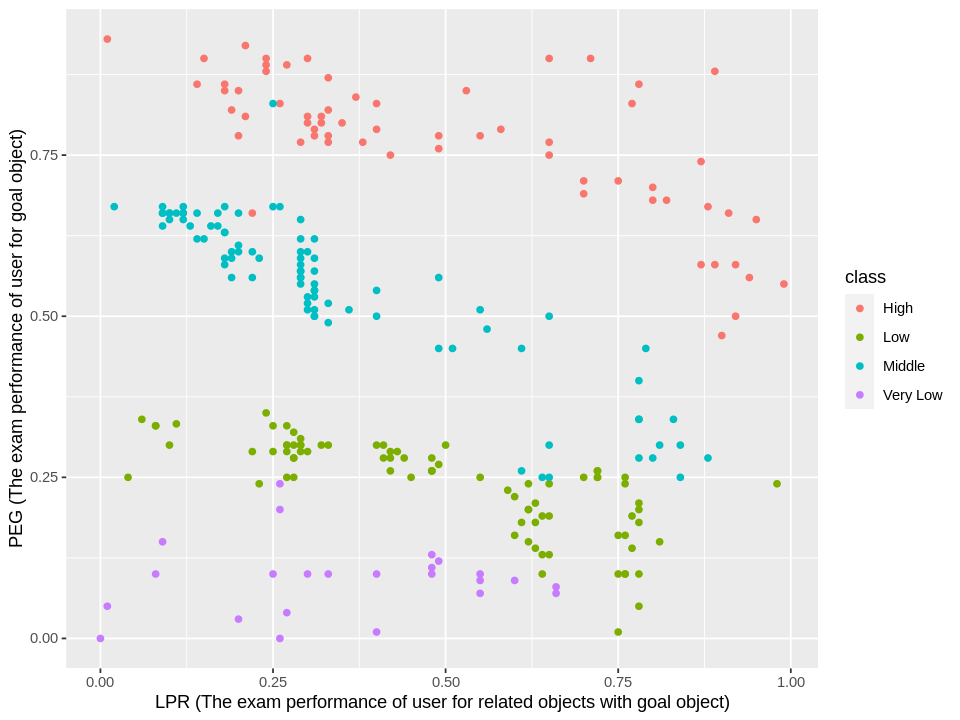

In [6]:
print("Figure 1: Graph of LPR vs PEG and knowledge class")
options(repr.plot.width = 8, repr.plot.height = 6)
initial_plot <- ggplot(knowledge_training, aes(x= LPR, y= PEG, colour = class)) + 
                      geom_point() +
                      xlab("LPR (The exam performance of user for related objects with goal object)") +
                      ylab("PEG (The exam performance of user for goal object)")
initial_plot

The relationship between LPR, PEG, and class is first plotted using a scatter plot. Scatter plots were chosen as they best represented the relationship between the variables. The scatter plots make it easier to see the relationship between the variables and the knowledge classes. The knowledge classes were colour coded to help visualize the distribution. This is done to prepare for later steps, which are related to predicting the knowledge classes. 

## K-Nearest Neighbours Classification

In [7]:
knowledge_recipe <- recipe(class~LPR+PEG, data = knowledge_training) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())
knowledge_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [8]:
#Training the classifier

#model specification

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit(data = knowledge_training)

knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04263566
Best kernel: rectangular
Best k: 5

A workflow of the training data was created using `recipe`, `nearest_neighbor` and `workflow`. This allows for the training of the classifier to occur so it can learn how to predict the outcome of the desired variables. 

In [9]:
#Predict the data using the test 
print("Table 4: The predicted data set")
knowledge_test_predictions <- predict(knn_fit, knowledge_testing) |>
  bind_cols(knowledge_testing)

# knowledge_test_predictions <- knowledge_test_predictions[order(knowledge_test_predictions$.pred_class),]
knowledge_test_predictions

[1] "Table 4: The predicted data set"


.pred_class,LPR,PEG,class
<fct>,<dbl>,<dbl>,<fct>
High,0.60,0.85,High
High,0.67,0.85,High
High,0.30,0.90,High
⋮,⋮,⋮,⋮
Very Low,0.07,0.09,Very Low
Very Low,0.09,0.11,Very Low
Very Low,0.10,0.10,Very Low


We predicted the data set using the “testing” data that was loaded in the first step. 

### Assessing the quality of our model

In [10]:
#assessing the quality of our model
print("Table 5.1: Table of the accuracy of our model")
knowledge_test_predictions |>
  metrics(truth = class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

[1] "Table 5.1: Table of the accuracy of our model"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9724138


The testing data is then used to assess the quality of our model. It was found to be 97.2% accurate. 

In [11]:
print("Table 5.2: Table of predicted and correct labels")
confusion <- knowledge_test_predictions |>
             conf_mat(truth = class, estimate = .pred_class)
confusion

[1] "Table 5.2: Table of predicted and correct labels"


          Truth
Prediction High Low Middle Very Low
  High       39   0      0        0
  Low         0  45      1        2
  Middle      0   1     33        0
  Very Low    0   0      0       24

The confusion matrix of the classifier (`conf_mat`) shows a table of predicted and correct labels.

In [12]:

# create the 25/75 split of the training data into training and validation
knowledge_split <- initial_split(knowledge_training, prop = 0.75, strata = class)
knowledge_subtrain <- training(knowledge_split)
knowledge_validation <- testing(knowledge_split)

# recreate the standardization recipe from before 
# (since it must be based on the training data)

knowledge_recipe <- recipe(class ~ ~ LPR+PEG, 
                        data = knowledge_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit(data = knowledge_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, knowledge_validation) |>
  bind_cols(knowledge_validation)

# compute the accuracy
acc <- validation_predicted |>
  metrics(truth = class, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.9545455

We created a 25/75 split of the training data into two subsets of training data and validation data. The validation subset is used to evaluate the classifier without implementing testing data. Thus, we need to recreate the standardization recipe from before since our validation data must be based on the training data. We will use the old knn_spec model from before to do so. This allows us to receive predictions on the validation data and compute the accuracy of our predictions based on the validation data. 

We used the new model to predict the accuracy of our data, which was discovered to be 95.5%.

## Using Our Model

In [13]:

knowledge_vfold <- vfold_cv(knowledge_training, v = 5, strata = class)

knowledge_recipe <- recipe(class ~ LPR+PEG, 
                        data = knowledge_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model 
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = knowledge_vfold)

knn_fit


splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [14]:
print("Table 6: The data with metrics collected")
knn_fit |> 
  collect_metrics()

[1] "Table 6: The data with metrics collected"


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.9576808,5,0.009194200,Preprocessor1_Model1
roc_auc,hand_till,0.9942005,5,0.003150278,Preprocessor1_Model1


Then, cross-validation of our training data was performed using 5 folds.  Then, we create our data analysis workflow, using the `fit_resamples function` for training. This runs cross-validation on each train/validation split. We utilized `collect_metrics` to determine the accuracy and standard error of our dataset. The accuracy we obtained was approximately 95.8%, with a standard error of 0.92%. This indicates that our actual accuracy may range between 94.9% and 96.7%.

In [15]:
print("Table 7: The second v-fold conducted")

knowledge_vfold <- vfold_cv(knowledge_training, v = 10, strata = class)

vfold_knn <- workflow() |>
                  add_recipe(knowledge_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = knowledge_vfold) |>
                  collect_metrics()

vfold_knn

[1] "Table 7: The second v-fold conducted"


! Fold06: internal:
  No observations were detected in `truth` for level(s): 'Very Low'
  Computation will proceed by ignoring those levels.



.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.9613504,10,0.009953930,Preprocessor1_Model1
roc_auc,hand_till,0.9908289,10,0.005317915,Preprocessor1_Model1


Here, we use 10-fold cross-validation. Using 10-fold instead of 5-fold cross-validation usually reduces the standard error. In this case, using 10-fold instead of 5-fold cross-validation did not reduce the standard error in the cross-validation, but the accuracy was increased by 0.4%. Additionally, increasing the number of folds also leads to an increase in computational time. Hence, we opted for 10-fold cross-validation to minimize the error while also keeping the computation time within a reasonable limit.

In [16]:
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec_2

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


To improve our classifier, we use cross-validation to calculate accuracy for each value of  K in a reasonable range, and then pick the value of K that gives us the best accuracy.

## Finding the ideal K value

In [17]:
print("Table 8: finding optimal K value")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec_2) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

knn_accuracies <- knn_results |>
  filter(.metric == "accuracy")

knn_accuracies

[1] "Table 8: finding optimal K value"


! Fold06: internal:
  No observations were detected in `truth` for level(s): 'Very Low'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9494929,10,0.01298131,Preprocessor1_Model01
6,accuracy,multiclass,0.9613504,10,0.00995393,Preprocessor1_Model02
11,accuracy,multiclass,0.9570541,10,0.01251508,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,multiclass,0.6390769,10,0.03385842,Preprocessor1_Model18
91,accuracy,multiclass,0.6118234,10,0.03570837,Preprocessor1_Model19
96,accuracy,multiclass,0.5845812,10,0.04175183,Preprocessor1_Model20


A data frame with the `neighbors` containing trial values of k is created. Then k_vals is created containing values from 1 to 100 (stepping by 5) using the `seq` function. Then we pass that data frame to the grid argument of `tune_grid`. The `tune_grid` function will conduct a grid search of the best hyper-parameters to use for the classification. 

We can decide which number of neighbours is best by plotting the accuracy versus K as shown in Figure 2 below. Graphing accuracy vs k to help visualize the ideal k value for the most accurate computation. The point with the highest accuracy on the graph will be the best k value. 

[1] "Figure 2: Graph of accuracy vs k to find ideal k value"


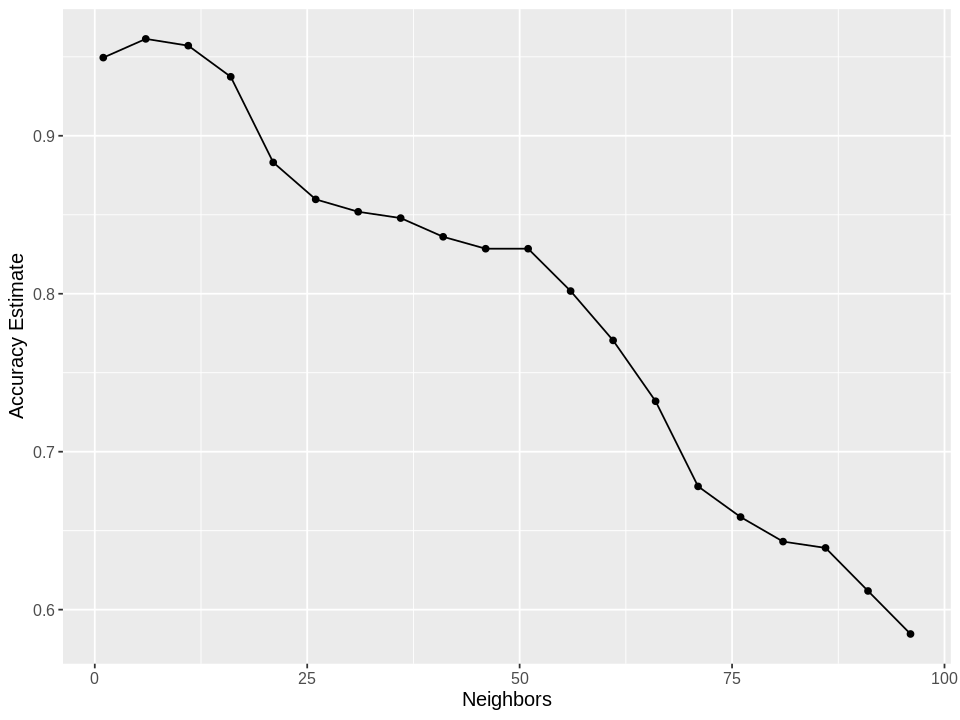

In [18]:
print("Figure 2: Graph of accuracy vs k to find ideal k value")

accuracy_and_k <- ggplot(knn_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_and_k


Here we notice the highest accuracy occurs when k is approximately 5. The accuracy does not drastically change around values close to k. As the number of neighbours increases, the accuracy of our model decreases. Therefore, we need to graph accuracy vs k to help visualize the ideal k value for the most accurate computation (see Figure 2 above). 

## Discussion

### Findings

From analyzing Figures 1 and 2, there is an observed negative relationship between the exam performance in related subjects, exam performance in the goal subject and level of knowledge. As the exam performance in related subjects increases, the goal subject exam performance decreases. As seen in our visualization (Figure 1), there seems to be a direct correlation between the level of knowledge in the goal subject and the exam performance of the goal subject. Looking at Figure 1, some students in the high-knowledge class did not perform too well on the LPR exam. According to the outcome of our analysis, individuals performing well on the goal subject examination (~75%) have a higher knowledge class. After assessing the quality of our predictor, we found that accuracy was approximately 95.5%. This is likely a result of there being a strong correlation between the variables, hence a higher prediction accuracy.  

When the number of neighbours is increased to 10, the accuracy begins to decrease much faster, with the lowest accuracy of 58% occurring when k is approximately 96. Additionally, when computing the 10 cross-validation folds in Tables 7 and 8, we notice that at the 6th fold, there were no values detected for the class “very low,” indicating a low number of students in that knowledge class. Tables 3.1 and 3.2 show the distribution of students in each class. In the training data (Table 3.1), a majority of the students fell under the “middle” class, with “low” as a close second, while in the testing data, a majority of students fell under the “low” class, with “high” following. 


## Expected outcomes 

Based on our initial visualization of the data set, we expected that the exam performance of the goal subject would highly impact the knowledge level of individuals. The results of our analysis did in fact align with these predictions. When we evaluated the accuracy of the predictor we found that it was 95.5% accurate. This is to be expected because the data points don’t have many outliers and seem to consistently follow the clear relationship between the variables. There also seems to be a relatively consistent trend in the data, with knowledge class being determined by performance on the PEG exam. Usually, the more knowledgeable a person is on a topic, the better they will perform on assessments/exams. Additionally, the optimal k value of approximately 5 was expected, as k-nearest neighbor classifications are usually accurate for small values of k and become more inaccurate as the number of neighbours increases. 

## Impact

Since our predictor was accurate, it suggests a strong correlation between exam performance and knowledge class. The findings have an impact on the data, as almost all the students who scored higher on the PEG exam fell in the high knowledge class. The findings suggest that exam scores are an accurate representation of the students’ knowledge level. This information would encourage students to study more for exams to achieve a high score. However, despite these findings, it is unlikely that exam performance is the only variable that affects knowledge level. There could also be other factors such as study time and repetition that may also influence knowledge class. Some students may have studied DC machines for a longer period, while others may have spent more time preparing for the exam. Additionally, some students may possess knowledge but did not perform well on the exams due to external or unknown factors. Exams may not necessarily be the best indicator of knowledge level, but taking more variables into account will result in a better representation of results. 

## Further questions 

Some further questions that we can ask ourselves include investigating the ideal study time for getting higher knowledge levels or if a higher level of repetition results in higher exam scores. Additionally, other forms of data analysis could be used (such as regression) to conduct an analysis between the variables and result in a numerical outcome (i.e. predicting study time based on exam performance or predicting exam scores from study time). 

## References
##### These include citations for all images used, background information and the dataset we used

- Agarwal, T. (2019). DC Generator : Construction, Working Principle,Types, and Applications. Retrieved 10 April 2023, from https://www.elprocus.com/what-is-a-dc-generator-construction-working-principle-and-applications/

- BYJU'S. (2022, May 13). DC motor - definition, working, types, and faqs. BYJUS. Retrieved April 8, 2023, from https://byjus.com/physics/dc-motor/#:~:text=A%20DC%20motor%20is%20an,transformed%20into%20the%20mechanical%20rotation. 

- Government polytechnic srinagar (Garhwal) | Uttarakhand. (n.d.). Retrieved April 8, 2023, from https://www.gpsrinagar.org/lms/ELECTRICAL/dc%20machine-converted.pdf 

- Kahraman, H. T., Colak, I., &amp; Sagiroglu, S. (2013, June 26). User Knowledge Modeling Data Set. UCI Machine Learning Repository: User knowledge modeling data set. Retrieved April 8, 2023, from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling 

- Search, I., & Motor, E. (2023). Electric Motors: Types, Applications, Construction, and Benefits. Retrieved 13 April 2023, from https://www.iqsdirectory.com/articles/electric-motor.html
